# Model selection experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import generate_toy_data
from utils import get_losses, empirical_loss, empirical_risk, KL_divergence


from sklearn.linear_model import LinearRegression
import pandas as pd

import seaborn as sns
sns.set_theme(rc={'figure.figsize':(8, 4)})

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

## Toy Dataset

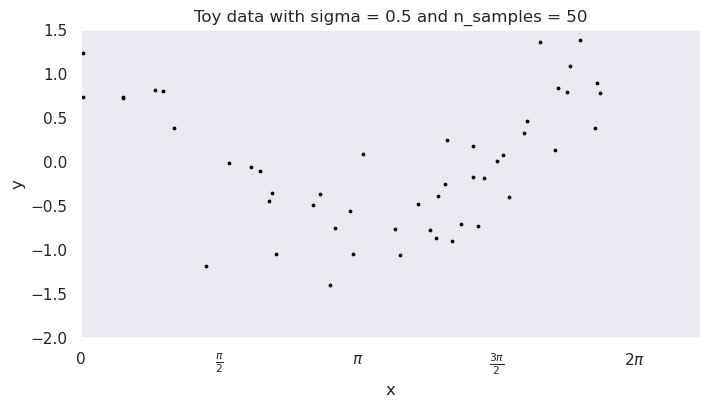

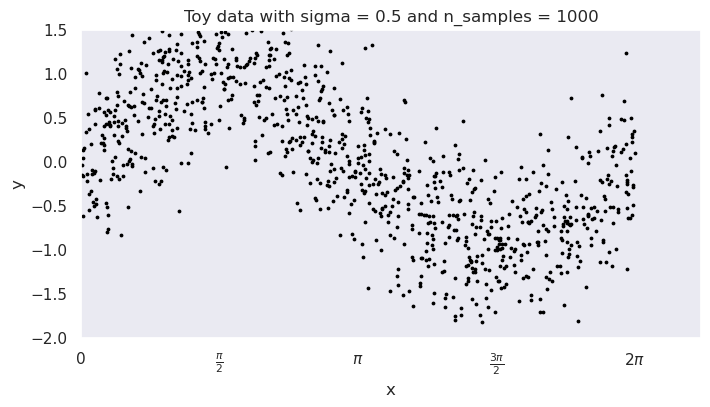

In [2]:
n = 50
n_test = 1000
s = np.sqrt(0.25) 
x, y = generate_toy_data(type="cos", show=True, n_samples=n, sigma=s)
x_test, y_test = generate_toy_data(show=True, n_samples=n_test, sigma=s)

### Polynomial Models

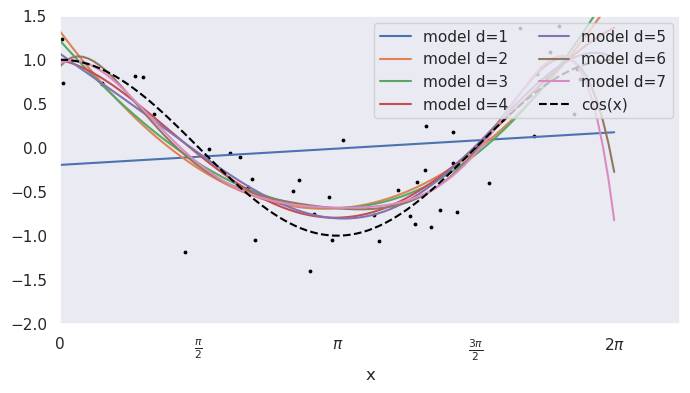

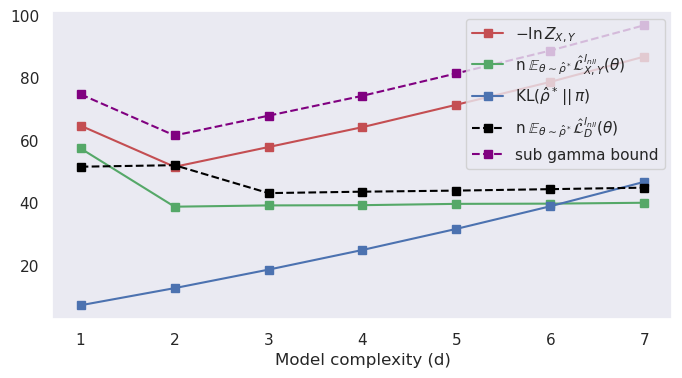

In [3]:
L = 7
sigma_sq = 0.5
sigma_pi_sq = 1/0.005

x_range = np.linspace(0, 2 * np.pi, 100)

phi = lambda x, d: np.array([x**i for i in range(d+1)]).T

s_sq = 0.28
c = 0.005
delta = 0.05

nmlls = []
losses = []
test_losses = []
kls = []
bounds = []

fig, ax = plt.subplots()
for d in range(1, L+1):

    p = np.polyfit(x, y, d)
    y_range = np.polyval(p, x_range)
    ax.plot(x_range, y_range, label=f"model d={d}")

    empirical_loss_, kl = get_losses(x, y, d, n,sigma_pi_sq=sigma_pi_sq, sigma_sq=sigma_sq, phi=phi)
    test_loss_, _ = get_losses(x_test, y_test, d, n, sigma_pi_sq=sigma_pi_sq, sigma_sq=sigma_sq, phi=phi)
    nmlls.append(empirical_loss_ + kl)
    losses.append(empirical_loss_)
    kls.append(kl)
    test_losses.append(test_loss_)
    bound = n * s_sq / (2*(1-c)) - (np.log(delta))
    bounds.append(bound + empirical_loss_ + kl)

ax.scatter(x, y, color="black", s=3)
ax.plot(x_range, np.cos(x_range), label="cos(x)", color="black", linestyle="--")
ax.set_xlim(0, 2 * np.pi + 0.75)
ax.set_ylim(-2, 1.5)
ax.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi], ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax.set_xlabel("x")
ax.legend(loc="upper right", ncol=2)
ax.grid()
plt.show()


# plot the negative marginal log likelihood, loss and kl
fig, ax = plt.subplots()
ax.plot(range(1, L+1), nmlls, label=r"$- \mathrm{ln} \, Z_{X,Y}$", marker="s", color="r")
ax.plot(range(1, L+1), losses, label=r"$\mathrm{n}  \;  \mathbb{E}_{\theta \sim \hat{\rho}^*}\mathcal{\hat{L}}^{l_{nll}}_{X,Y}(\theta)$", marker="s", color="g")
ax.plot(range(1, L+1), kls, label=r"$\mathrm{KL}(\hat{\rho}^* \, || \, \pi)$", marker="s", color="b")
ax.plot(range(1, L+1), test_losses, label=r"$\mathrm{n}  \;  \mathbb{E}_{\theta \sim \hat{\rho}^*}\mathcal{\hat{L}}^{l_{nll}}_{D}(\theta)$", marker="s", linestyle="--", color="black")
ax.plot(range(1, L+1), bounds, label="sub gamma bound", marker="s", linestyle="--", color="purple")
ax.set_xlabel("Model complexity (d)")
ax.legend()
ax.grid()
plt.show()

### Sinosoidal Models

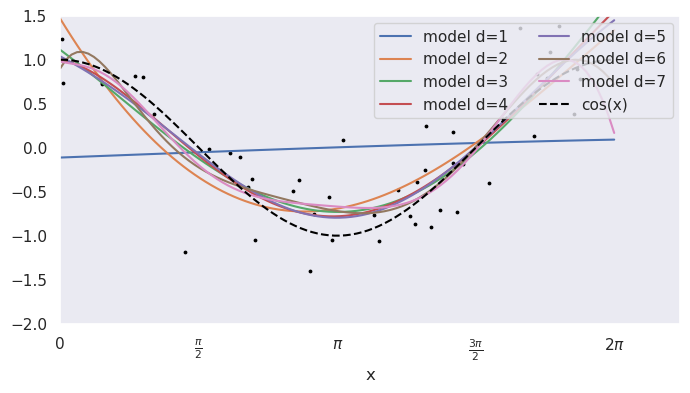

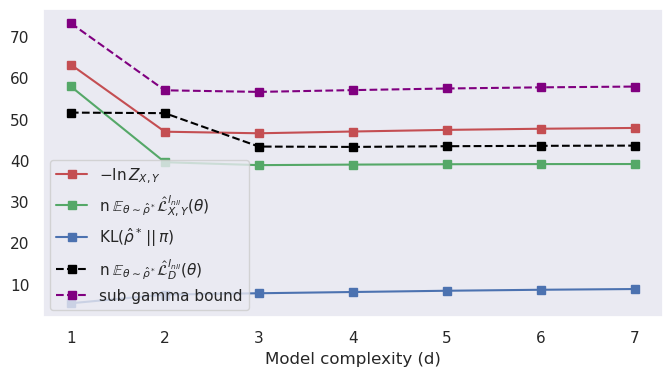

In [4]:
phi = lambda x, d: np.array([np.power(np.sin(x/(2 * np.pi)), i) for i in range(d+1)]).T

L = 7
sigma_sq = 0.5
sigma_pi_sq = 1/0.005

x_range = np.linspace(0, 2 * np.pi, 100)

s_sq = 0.28
c = 0.005
delta = 0.05

nmlls = []
losses = []
test_losses = []
kls = []
bounds = []

fig, ax = plt.subplots()
for d in range(1, L+1):
    phi_x = phi(x, d)
    
    model = LinearRegression()
    model.fit(phi_x, y)
    
    y_range = model.predict(phi(x_range, d))

    ax.plot(x_range, y_range, label=f"model d={d}")

    empirical_loss_, kl = get_losses(x, y, d, n,sigma_pi_sq=sigma_pi_sq, sigma_sq=sigma_sq, phi=phi)
    test_loss_, _ = get_losses(x_test, y_test, d, n, sigma_pi_sq=sigma_pi_sq, sigma_sq=sigma_sq, phi=phi)
    nmlls.append(empirical_loss_ + kl)
    losses.append(empirical_loss_)
    kls.append(kl)
    test_losses.append(test_loss_)
    bound = n * s_sq / (2*(1-c)) - (np.log(delta))
    bounds.append(bound + empirical_loss_ + kl)

ax.scatter(x, y, color="black", s=3)
ax.plot(x_range, np.cos(x_range), label="cos(x)", color="black", linestyle="--")
ax.set_xlim(0, 2 * np.pi + 0.75)
ax.set_ylim(-2, 1.5)
ax.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi], ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax.set_xlabel("x")
ax.legend(loc="upper right", ncol=2)
ax.grid()
plt.show()


# plot the negative marginal log likelihood, loss and kl
fig, ax = plt.subplots()
ax.plot(range(1, L+1), nmlls, label=r"$- \mathrm{ln} \, Z_{X,Y}$", marker="s", color="r")
ax.plot(range(1, L+1), losses, label=r"$\mathrm{n}  \;  \mathbb{E}_{\theta \sim \hat{\rho}^*}\mathcal{\hat{L}}^{l_{nll}}_{X,Y}(\theta)$", marker="s", color="g")
ax.plot(range(1, L+1), kls, label=r"$\mathrm{KL}(\hat{\rho}^* \, || \, \pi)$", marker="s", color="b")
ax.plot(range(1, L+1), test_losses, label=r"$\mathrm{n}  \;  \mathbb{E}_{\theta \sim \hat{\rho}^*}\mathcal{\hat{L}}^{l_{nll}}_{D}(\theta)$", marker="s", linestyle="--", color="black")
ax.plot(range(1, L+1), bounds, label="sub gamma bound", marker="s", linestyle="--", color="purple")
ax.set_xlabel("Model complexity (d)")
ax.legend()
ax.grid()
plt.show()

## Fuel Consumption Dataset

Number of samples in train: 106
Number of samples in test: 961


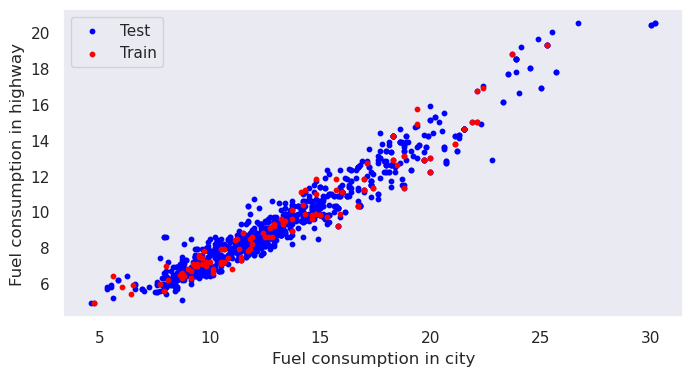

In [5]:
# load fuel consumption dataset
data = pd.read_csv("FuelConsumption.csv")

# extract test and train data for the two features
x_all = data.FUELCONSUMPTION_CITY.values
y_all = data.FUELCONSUMPTION_HWY.values

x, x_test, y, y_test = train_test_split(x_all, y_all, test_size=0.9, random_state=123)


# num_samples in test and train
n = len(x)
n_test = len(x_test)
print(f"Number of samples in train: {n}")
print(f"Number of samples in test: {n_test}")

# plot the train in red and test data in blue
fig, ax = plt.subplots()
ax.scatter(x_test, y_test, s=10, c="blue", label="Test")
ax.scatter(x, y, s=10, c="red", label="Train")
ax.set_xlabel("Fuel consumption in city")
ax.set_ylabel("Fuel consumption in highway")
ax.legend()
ax.grid()
plt.show()

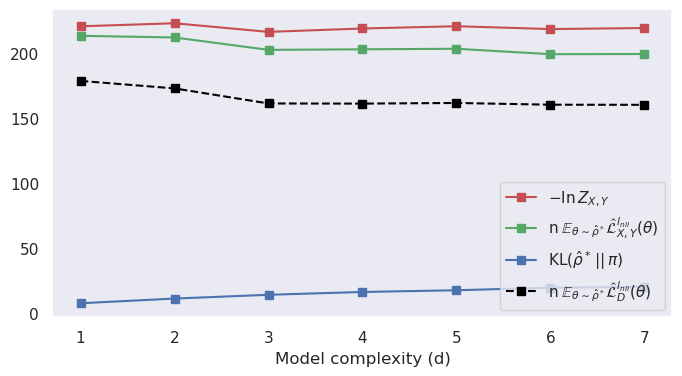

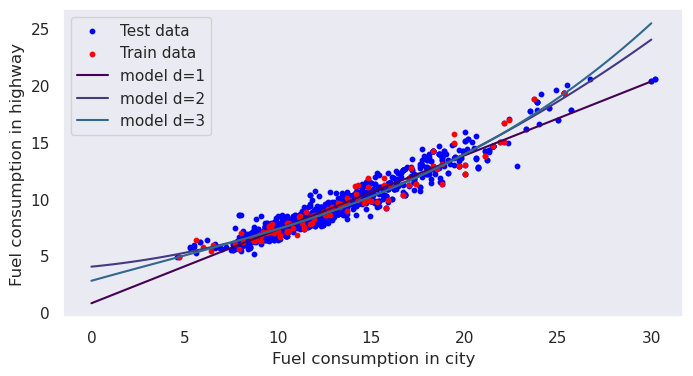

In [6]:
# model selection using marginal likelihood
L = 7
sigma_sq = 0.5
sigma_pi_sq = 500
nmlls = []
losses = []
test_losses = []
kls = []
colors = plt.cm.viridis(np.linspace(0, 1, L))
for d in range(1, L+1):
    
    p = np.polyfit(x, y, d)
    empirical_loss_, kl = get_losses(x, y, d, n, sigma_pi_sq=sigma_pi_sq, sigma_sq=sigma_sq, phi=phi)
    test_loss_, _ = get_losses(x_test, y_test, d, n, sigma_pi_sq=sigma_pi_sq, sigma_sq=sigma_sq, phi=phi)
    nmlls.append(empirical_loss_ + kl)
    losses.append(empirical_loss_)
    kls.append(kl)
    test_losses.append(test_loss_)

# plot the negative marginal log likelihood, loss and kl
fig, ax = plt.subplots()
ax.plot(range(1, L+1), nmlls, label=r"$- \mathrm{ln} \, Z_{X,Y}$", marker="s", color="r")
ax.plot(range(1, L+1), losses, label=r"$\mathrm{n}  \;  \mathbb{E}_{\theta \sim \hat{\rho}^*}\mathcal{\hat{L}}^{l_{nll}}_{X,Y}(\theta)$", marker="s", color="g")
ax.plot(range(1, L+1), kls, label=r"$\mathrm{KL}(\hat{\rho}^* \, || \, \pi)$", marker="s", color="b")
ax.plot(range(1, L+1), test_losses, label=r"$\mathrm{n}  \;  \mathbb{E}_{\theta \sim \hat{\rho}^*}\mathcal{\hat{L}}^{l_{nll}}_{D}(\theta)$", marker="s", linestyle="--", color="black")

ax.set_xlabel("Model complexity (d)")
ax.legend(loc="lower right")
ax.grid()
plt.show()

# plot the best model that minimizes the nllm
fig, ax = plt.subplots()
ax.scatter(x_test, y_test, s=10, c="blue", label="Test data")
ax.scatter(x, y, s=10, c="red", label="Train data")
ax.set_xlabel("Fuel consumption in city")
ax.set_ylabel("Fuel consumption in highway")
for d in range(1, 4):
    p = np.polyfit(x, y, d)
    x_ = np.linspace(0, 30, 100)
    y_ = np.polyval(p, x_)
    ax.plot(x_, y_, label=f"model d={d}", color=colors[d-1])
ax.legend()
ax.grid()
plt.show()


## Open Power Systems Dataset

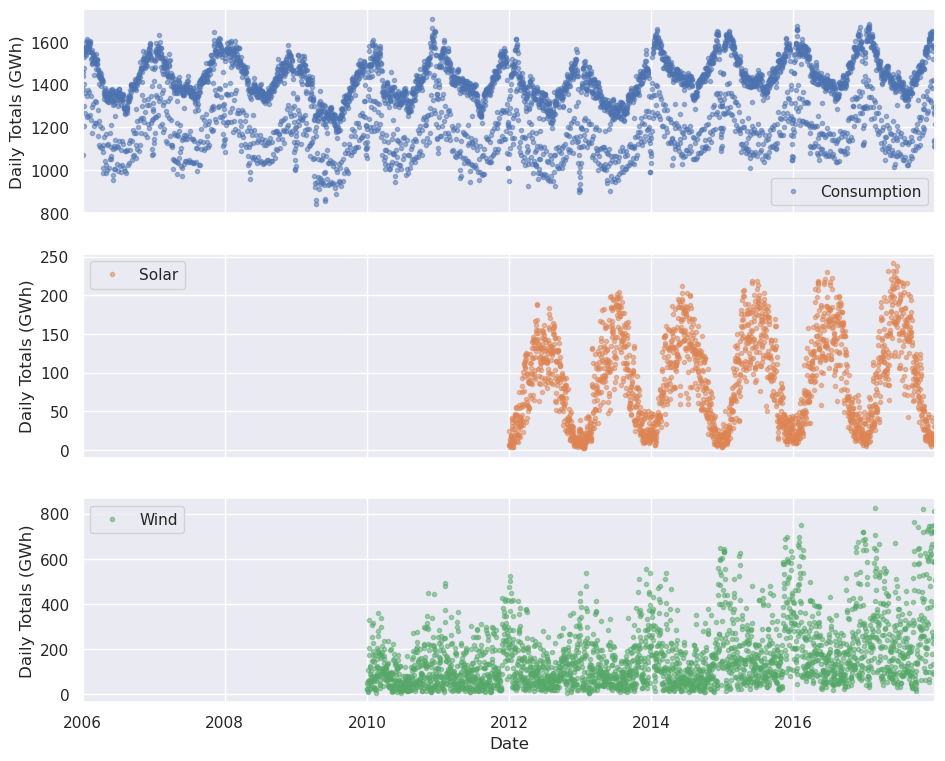

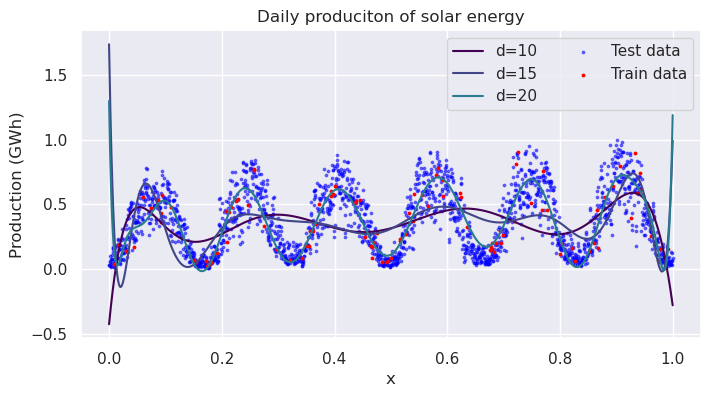

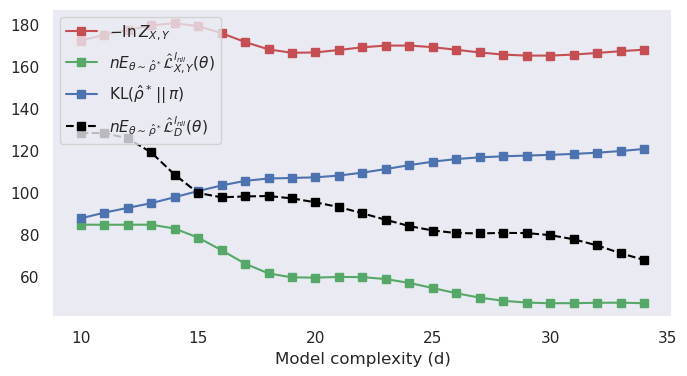

In [10]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

# get solar data and indecies when it's not NaN
solar = opsd_daily['Solar']
solar = solar.dropna()
solar = solar.values
solar = solar / solar.max()

x_all = np.arange(solar.shape[0]) / solar.shape[0]
y_all = solar

x, x_test, y, y_test = train_test_split(x_all, y_all, test_size=0.95, random_state=42)

n = len(x)

sigma_pi_sq = 1e10
sigma_sq = 0.01

phi = lambda x, d: np.array([x**i for i in range(d+1)]).T

# fit the model
nmlls = []
losses = []
test_losses = []
kls = []
L = 35
r = range(10, L)
fig, ax = plt.subplots()
colors = plt.cm.viridis(np.linspace(0, 1, len(r)))
for d in r:
    p = np.polyfit(x, y, d)
    y_hat = np.polyval(p, x_all)
    sorted_x = np.sort(x_all)
    sorted_y = y_hat[np.argsort(x_all)]

    if d in [1, 5, 7, 10, 15, 20, 35]:
        ax.plot(sorted_x, sorted_y, label=f"d={d}", color=colors[d-10])


    empirical_loss_, kl = get_losses(x, y, d, n, sigma_pi_sq=sigma_pi_sq, sigma_sq=sigma_sq, phi=phi)

    test_loss_= get_losses(x_test, y_test, d, n, sigma_pi_sq=sigma_pi_sq, sigma_sq=sigma_sq, phi=phi)[0]

    nmlls.append(empirical_loss_ + kl)
    losses.append(empirical_loss_)
    kls.append(kl)
    test_losses.append(test_loss_)


ax.set_xlabel("Days")
ax.set_ylabel("Production (GWh)")
ax.set_title("Daily produciton of solar energy")
ax.grid()
ax.scatter(x_test, y_test, color="blue", s=3, alpha=0.5, label="Test data")
ax.scatter(x, y, color="red", s=3, label="Train data")



ax.set_xlabel("x")
# put the legend on top right corner with two columns
ax.legend(loc="upper right", ncol=2)
ax.grid()
plt.show()


# plot the negative marginal log likelihood, loss and kl
fig, ax = plt.subplots()
ax.plot(r, nmlls, label=r"$- \mathrm{ln} \, Z_{X,Y}$", marker="s", color="r")
ax.plot(r, losses, label=r"$n E_{\theta \sim \hat{\rho}^*} \mathcal{\hat{L}}^{l_{nll}}_{X,Y}(\theta)$", marker="s", color="g")
ax.plot(r, kls, label=r"$\mathrm{KL}(\hat{\rho}^* \, || \, \pi)$", marker="s", color="b")
ax.plot(r, test_losses, label=r"$n E_{\theta \sim \hat{\rho}^*} \mathcal{\hat{L}}^{l_{nll}}_{D}(\theta)$", marker="s", linestyle="--", color="black")
ax.set_xlabel("Model complexity (d)")
ax.legend(loc="upper left")
ax.grid()
plt.show()

## Empirical comparison of bound values

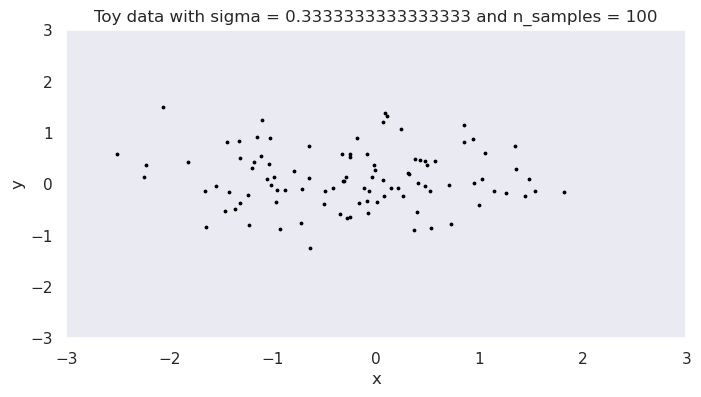

In [8]:
# gaussian data
sigma_pi_sq = 1/100
sigma_noise_sq = 1/9
sigma_sq = 2
d = 20
w_star = np.random.randn(d)
w_star = w_star / np.linalg.norm(w_star) / 2

_, _ = generate_toy_data(n_samples=100, show=True, sigma=np.sqrt(sigma_noise_sq), type="gaussian", w=w_star)

x_all, y_all = generate_toy_data(n_samples=10**6, show=False, sigma=np.sqrt(sigma_noise_sq), type="gaussian", w=w_star)
x_test, y_test = generate_toy_data(n_samples=10**6, show=False, sigma=np.sqrt(sigma_noise_sq), type="gaussian", w=w_star)

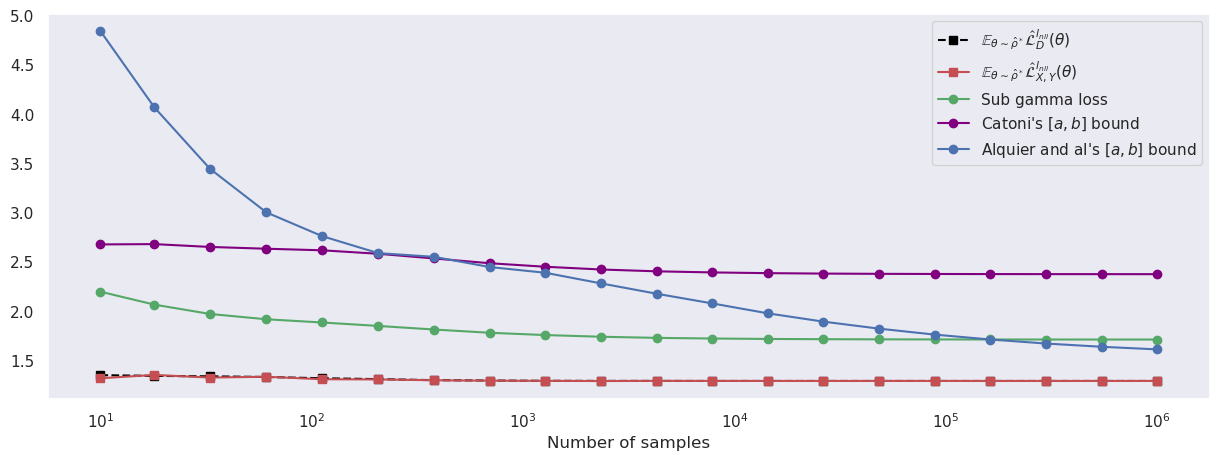

In [9]:
empirical_nll_losses = []
test_losses = []
bounds = []
catoni_bounds = []
alquier_bounds = []
a = 1
b = 4
s_sq = 0.28
c = 0.005
delta = 0.05

phi = lambda x, d: x

# select n with 20 values from 10 to 10^6
num_samples = [int(i) for i in np.logspace(1, 6, 20, base=10)]
for n in num_samples:
    # randomly pick n samples from the generated data
    idx = np.random.choice(10**6, int(n))
    x = x_all[idx]
    y = y_all[idx]
    A = (1/sigma_sq) * x.T @ x + (1/sigma_pi_sq) * np.eye(d)
    A_inv = np.linalg.inv(A)
    w_hat = (1/sigma_sq) * A_inv @ x.T @ y
    empirical_nll_loss = empirical_risk(y, w_hat, x, sigma_sq=sigma_sq)
    empirical_nll_losses.append(empirical_nll_loss)
    phi_x_test = x_test
    test_loss = empirical_risk(y_test, w_hat, x_test, sigma_sq=sigma_sq)
    test_losses.append(test_loss)
    bound = s_sq / (2*(1-c)) - (np.log(delta) / n)
    kl = KL_divergence(20, A, A_inv, w_hat, sigma_pi_sq)
    emp = empirical_loss(n, y, w_hat, x, A_inv, sigma_sq)
    bounds.append(emp/n   + bound + kl/n)
    emp2, kl2 = get_losses(x, y, d-1, n, bounded=True, sigma_sq=sigma_sq, sigma_pi_sq=sigma_pi_sq, phi=phi)
    lnZxy = -emp - kl
    catoni_bound = a + ((b-a)/(1-np.exp(a-b))) *(1- np.exp(a + (1/n) * lnZxy))
    catoni_bounds.append(catoni_bound)
    alquier_bound = emp2/n + (kl2 - np.log(delta) + 0.5 * (b-a)**2)* (1/np.sqrt(n))
    alquier_bounds.append(alquier_bound)

# add seaborn grid
sns.set_theme(rc={'figure.figsize':(8, 4)})

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(num_samples, test_losses, label=r"$\mathbb{E}_{\theta \sim \hat{\rho}^*}\mathcal{\hat{L}}^{l_{nll}}_{D}(\theta)$", marker="s", linestyle="--", color="black")
ax.plot(num_samples, empirical_nll_losses, label=r"$\mathbb{E}_{\theta \sim \hat{\rho}^*}\mathcal{\hat{L}}^{l_{nll}}_{X,Y}(\theta)$", marker="s", color="r")
ax.plot(num_samples, bounds, label=r"Sub gamma loss", marker="o", color="g")
ax.plot(num_samples, catoni_bounds, label=r"Catoni's $[a, b]$ bound", marker="o", color="purple")
ax.plot(num_samples, alquier_bounds, label=r"Alquier and al's $[a,b]$ bound", marker="o", color="b")
# set the x axis to 10^i for i in range(1, 6+1)
ax.set_xscale("log")
ax.set_xticks([10**i for i in range(1, 6+1)])

ax.set_xlabel("Number of samples")
ax.legend()
ax.grid()
plt.show()